In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# /content/drive/MyDrive/Key folders/python_class/CIFAR10.rar

Mounted at /content/drive


In [ ]:
# # Using built-in Python modules
# import os
# import numpy as np
# from PIL import Image

# classes_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# def load_image(image_path):
#     image = Image.open(image_path)
#     image = np.array(image)
#     return image

# def preprocess_image(image):
#     image = image.astype(np.float32) / 255.0
#     # image = (image - 0.5) / 0.5  # Normalize the pixel values to [-1, 1] (optional)
#     return image

# def get_data_loaders(data_dir, batch_size):
#     train_data_dir = os.path.join(data_dir, 'training') # find the directory of the training folder in the CIFAR10 dataset by adding 'training' to data_dir because of convenient naming.
#     test_data_dir = os.path.join(data_dir, 'testing')

#     train_images, train_labels = [], []
#     for class_name in sorted(os.listdir(train_data_dir)):
#         class_dir = os.path.join(train_data_dir, class_name)
#         for image_name in os.listdir(class_dir):
#             image_path = os.path.join(class_dir, image_name)
#             image = load_image(image_path)
#             train_images.append(image)
#             train_labels.append(int(class_name))

#     train_images = np.array(train_images)
#     train_labels = np.array(train_labels)

#     test_images, test_labels = [], []
#     for class_name in sorted(os.listdir(test_data_dir)):
#         class_dir = os.path.join(test_data_dir, class_name)
#         for image_name in os.listdir(class_dir):
#             image_path = os.path.join(class_dir, image_name)
#             image = load_image(image_path)
#             test_images.append(image)
#             test_labels.append(int(class_name))

#     test_images = np.array(test_images)
#     test_labels = np.array(test_labels)

#     train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)) # Combine both the training images array and the training labels array into a tensorflow dataset
#     train_dataset = train_dataset.shuffle(len(train_dataset)).batch(batch_size) # Combine both the training images array and the training labels array into a tensorflow dataset

#     test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
#     test_dataset = test_dataset.batch(batch_size)

#     return train_images, train_labels, test_images, test_labels, train_dataset, test_dataset

In [3]:
data_dir = '/content/drive/MyDrive/CIFAR10'
batch_size = 64

In [4]:
# Using built-in Python modules
import os
import numpy as np
from PIL import Image

classes_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

def load_image(image_path):
    image = Image.open(image_path)
    image = np.array(image)
    return image

def preprocess_image(image):
    image = image.astype(np.float32) / 255.0
    # image = (image - 0.5) / 0.5  # Normalize the pixel values to [-1, 1] (optional)
    return image


In [5]:
train_data_dir = os.path.join(data_dir, 'training') # find the directory of the training folder in the CIFAR10 dataset by adding 'training' to data_dir because of convenient naming.
print(train_data_dir)
test_data_dir = os.path.join(data_dir, 'testing')

/content/drive/MyDrive/CIFAR10/training


In [6]:
train_images, train_labels = [], []
for img_class in classes_index:
    class_dir = os.path.join(train_data_dir, os.listdir(train_data_dir)[img_class])
    print(class_dir)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = load_image(image_path)
        train_images.append(image)
        train_labels.append(img_class)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

/content/drive/MyDrive/CIFAR10/training/airplane
/content/drive/MyDrive/CIFAR10/training/automobile
/content/drive/MyDrive/CIFAR10/training/bird
/content/drive/MyDrive/CIFAR10/training/cat
/content/drive/MyDrive/CIFAR10/training/deer
/content/drive/MyDrive/CIFAR10/training/dog
/content/drive/MyDrive/CIFAR10/training/frog
/content/drive/MyDrive/CIFAR10/training/horse
/content/drive/MyDrive/CIFAR10/training/ship
/content/drive/MyDrive/CIFAR10/training/truck


In [8]:
print(train_images.shape)

(2529, 32, 32, 3)


In [10]:
print(train_labels.shape)

(2529,)


In [11]:
test_images, test_labels = [], []
for img_class in classes_index:
    class_dir = os.path.join(test_data_dir, os.listdir(train_data_dir)[img_class])
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = load_image(image_path)
        test_images.append(image)
        test_labels.append(img_class)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [12]:
test_images.shape

(10000, 32, 32, 3)

In [13]:
test_labels.shape

(10000,)

In [24]:
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels)) # Combine both the training images array and the training labels array into a tensorflow dataset
train_data = train_data.shuffle(len(train_data)).batch(batch_size) # Combine both the training images array and the training labels array into a tensorflow dataset

test_data = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_data = test_data.batch(batch_size)

In [25]:
print(train_data)

In [ ]:
# Using Tensorflow methods...
# import os # importing the Operating system of the computer
# import tensorflow as tf

# def load_and_preprocess_image(image_path):
#     image = tf.io.read_file(image_path)
#     image = tf.image.decode_jpeg(image, channels=3)
#     image = tf.image.resize(image, [32, 32])
#     image = (tf.cast(image, tf.float32) / 255.0)  # Normalize the pixel values to [0, 1]
#     return image

# def get_data_loaders(data_dir, batch_size):
#     train_data_dir = os.path.join(data_dir, 'training')
#     test_data_dir = os.path.join(data_dir, 'testing')

#     train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#         train_data_dir,
#         image_size=(32, 32),
#         batch_size=batch_size,
#         shuffle=True,
#     )

#     test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#         test_data_dir,
#         image_size=(32, 32),
#         batch_size=batch_size,
#         shuffle=False,
#     )

#     return train_dataset, test_dataset

In [ ]:
# Using Pytorch methods...
# import os
# import torch
# from torchvision import datasets, transforms

# def get_data_loaders(data_dir, batch_size):
#     data_transform = transforms.Compose([
#         transforms.ToTensor(),
#         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # normalize the data
#     ])

#     train_data = datasets.ImageFolder(os.path.join(data_dir, 'training'), transform=data_transform)
#     test_data = datasets.ImageFolder(os.path.join(data_dir, 'testing'), transform=data_transform)

#     train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
#     test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

#     return train_loader, test_loader

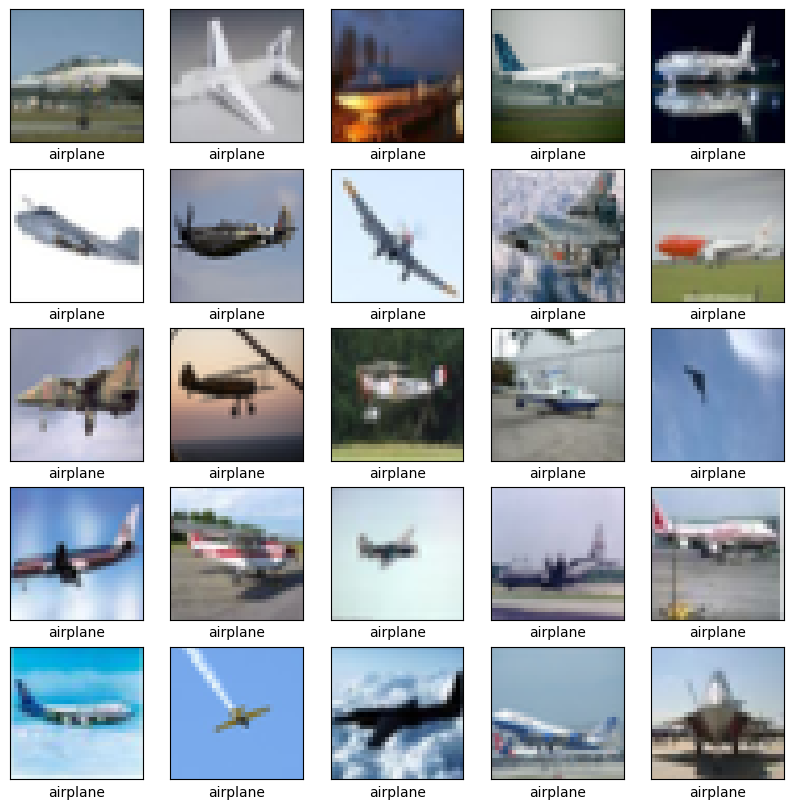

In [27]:
# Iterate over the training data
# for images, labels in train_data:
#     # Perform your training steps here
#     pass

# # Iterate over the testing data
# for images, labels in test_data:
#     # Perform your testing/validation steps here
#     pass

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

train_iter = iter(train_data)

plt.figure(figsize=(10,10))
for i in range(25):
    # Get a batch of data from the iterator
    batch_images, batch_labels = next(train_iter)

    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(batch_images[0])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[batch_labels[0]])
plt.show()

In [ ]:
# Define our CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

In [ ]:
# Compile & Fit the model
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.25, verbose=1)


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='upper right')

In [ ]:
# Test the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_loss)
print('\n')
print(test_acc)